In [44]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

df = pd.concat([X, y], axis=1)

df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

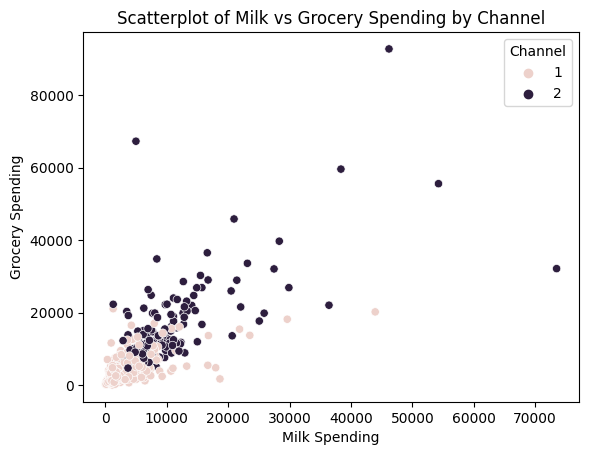

In [10]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')
plt.title('Scatterplot of Milk vs Grocery Spending by Channel')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.show()

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

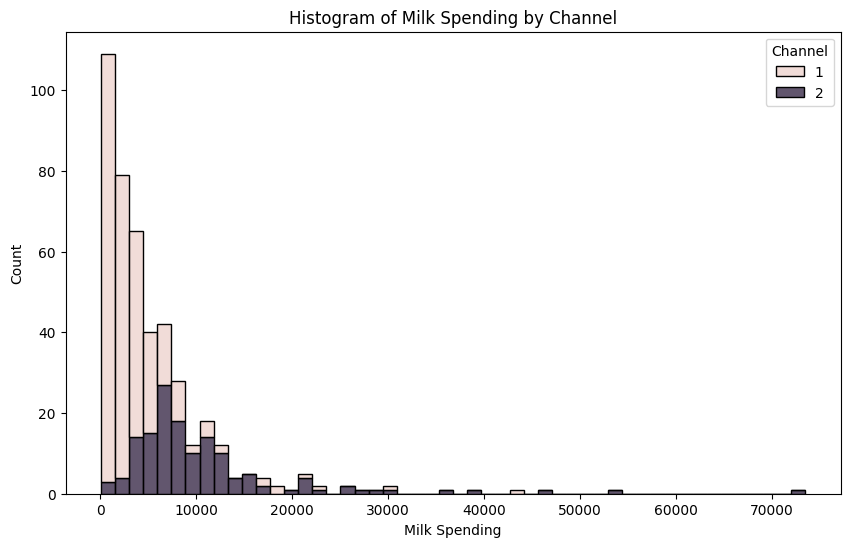

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack')
plt.title('Histogram of Milk Spending by Channel')
plt.xlabel('Milk Spending')
plt.ylabel('Count')
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

<Figure size 1200x800 with 0 Axes>

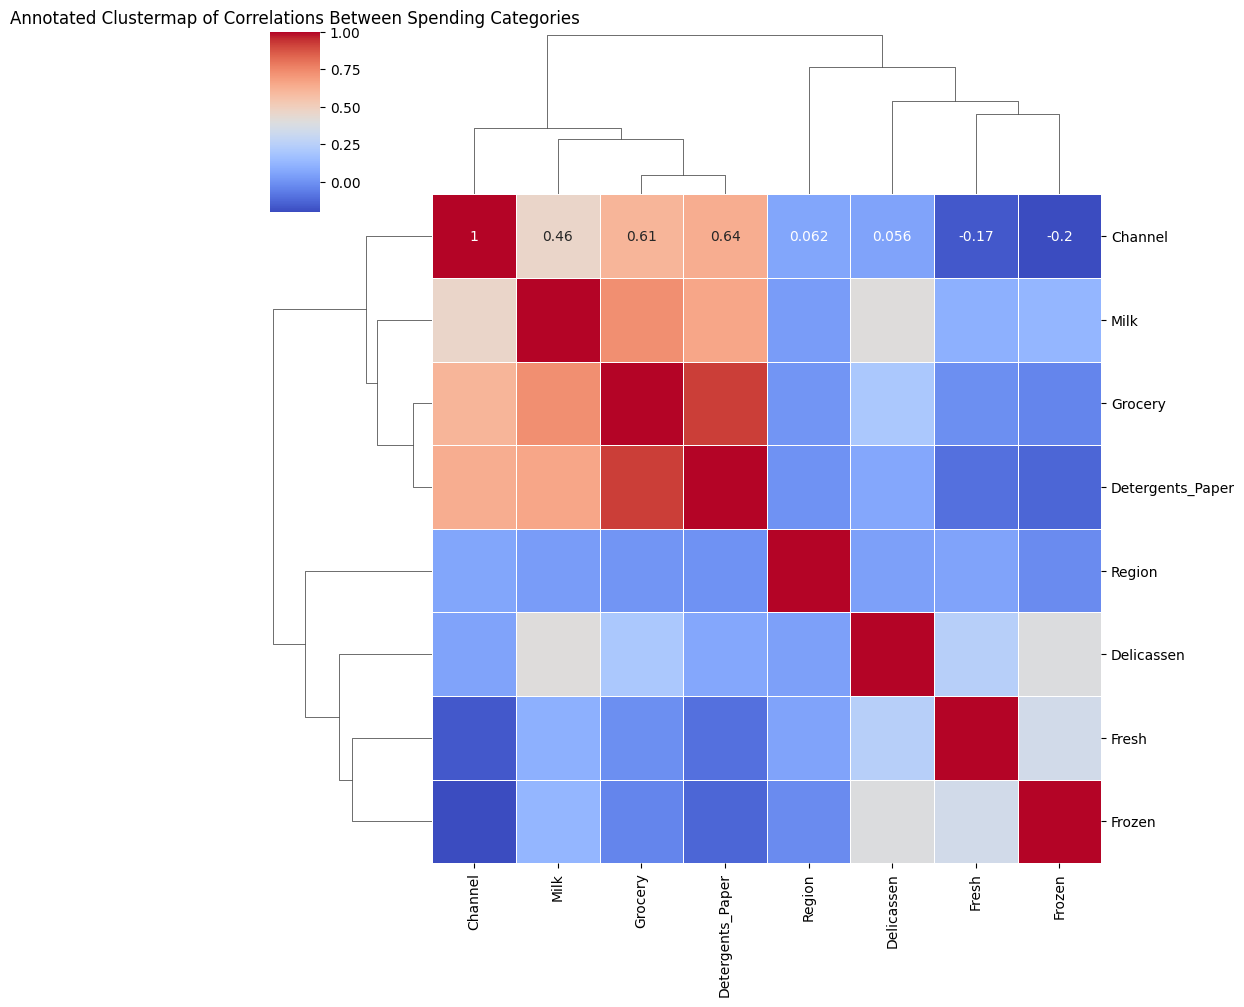

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Create a clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Annotated Clustermap of Correlations Between Spending Categories')
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

<Figure size 1200x1200 with 0 Axes>

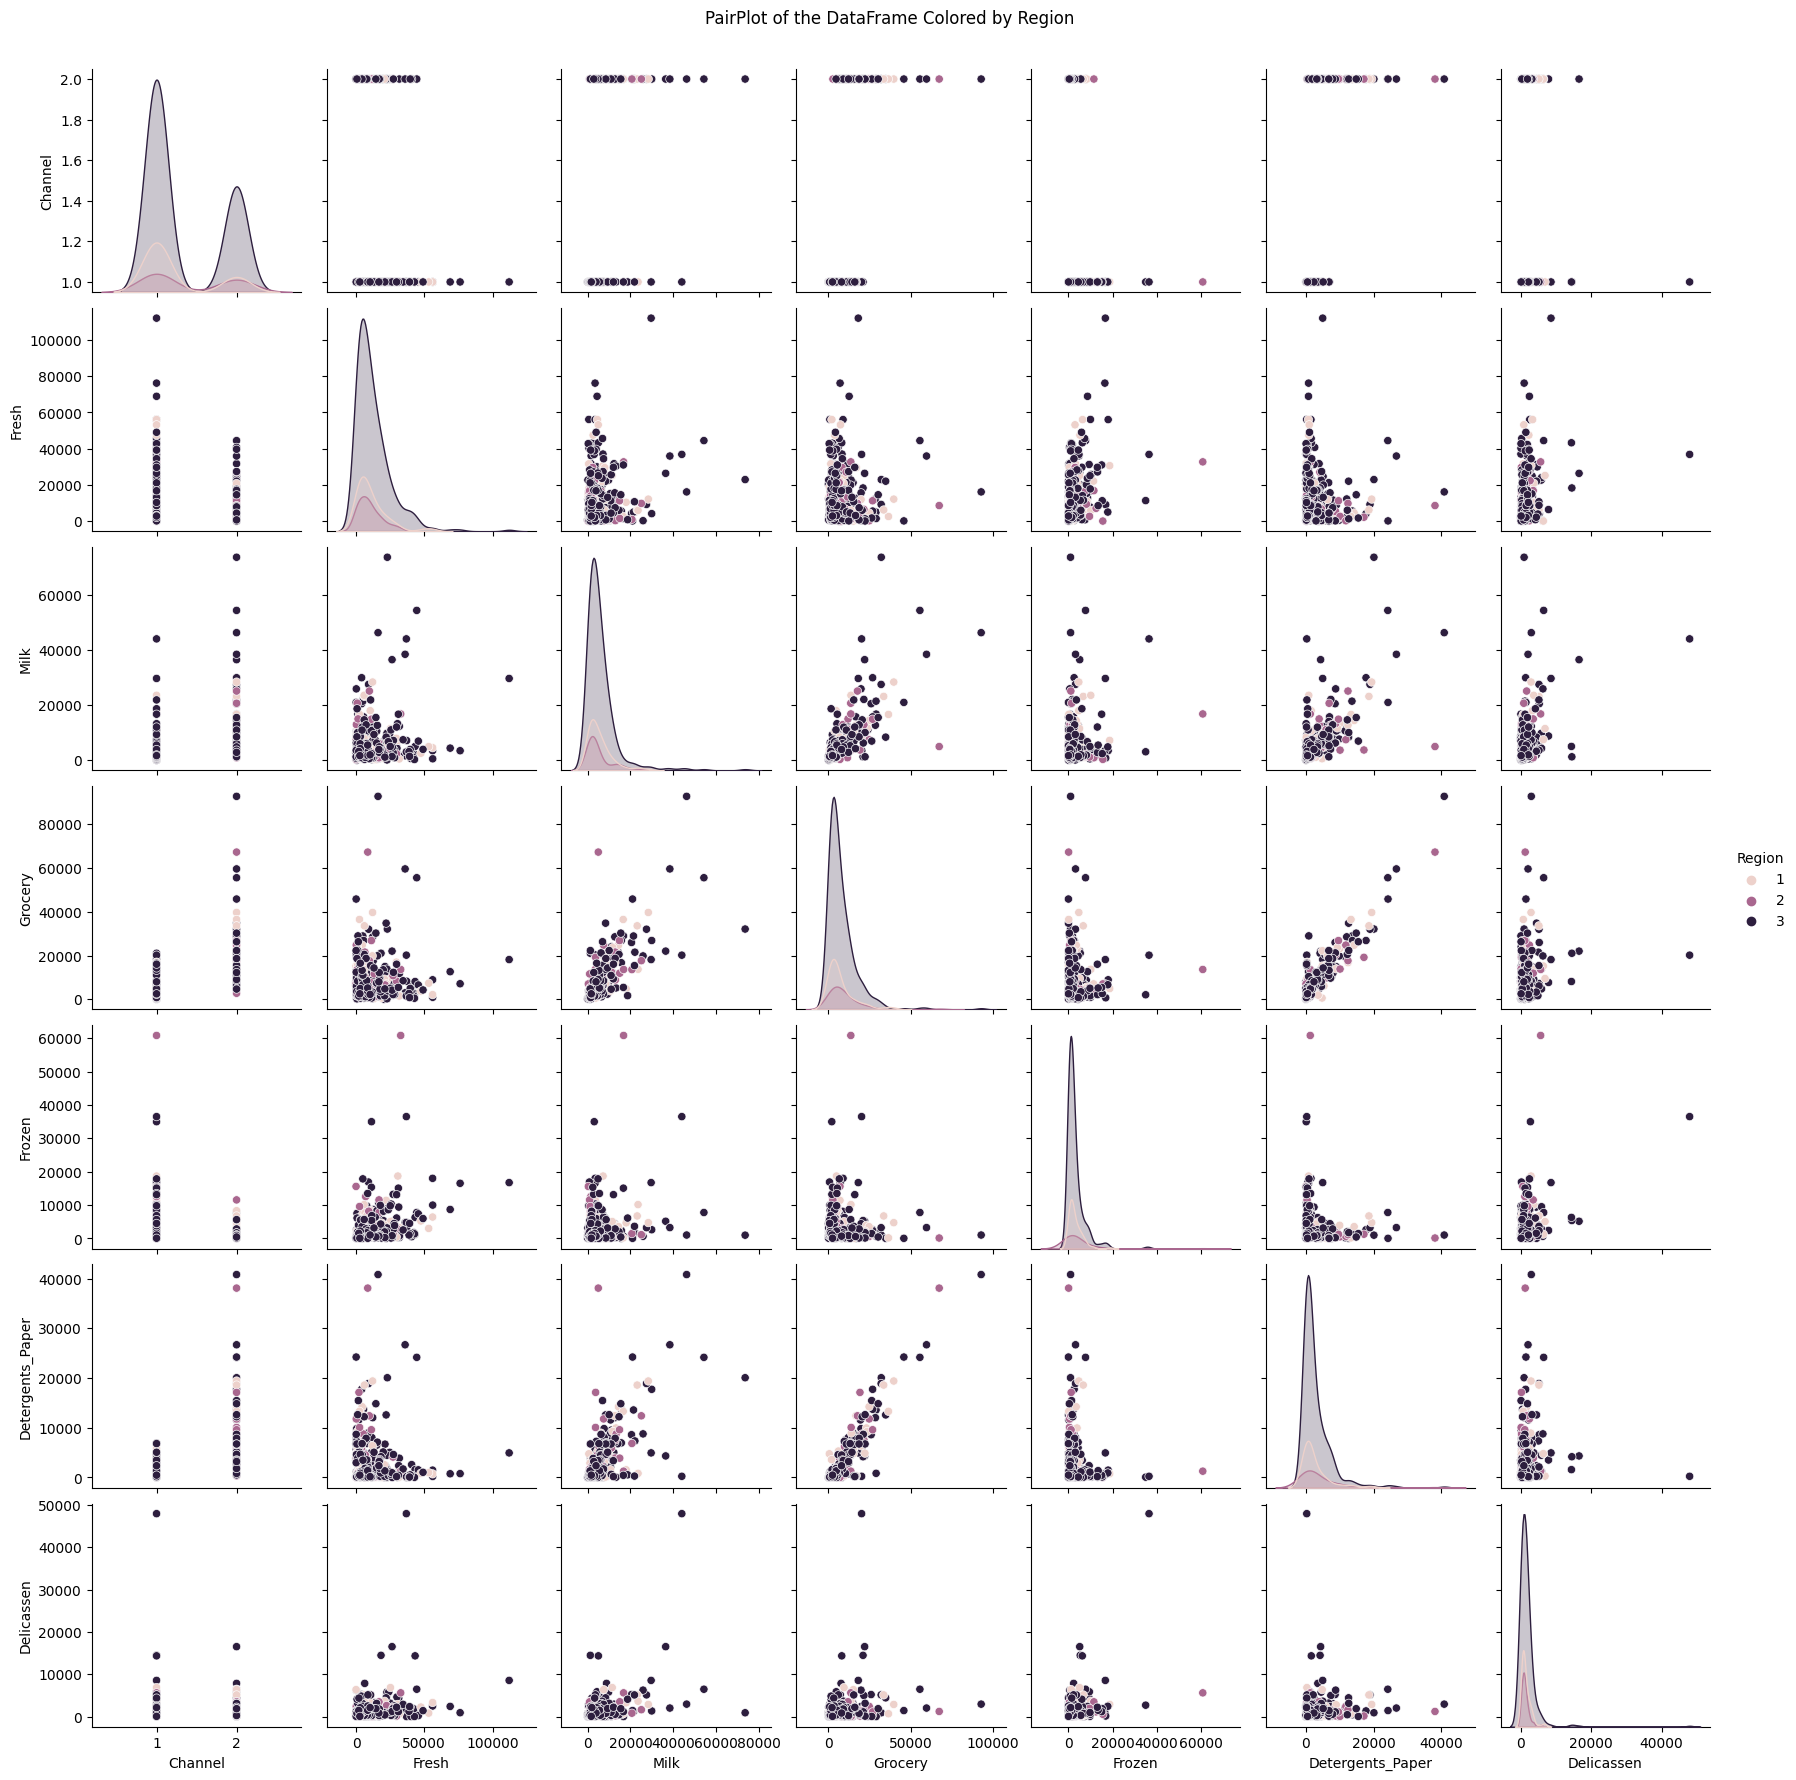

In [16]:
plt.figure(figsize=(12, 12))
sns.pairplot(df, hue='Region')
plt.suptitle('PairPlot of the DataFrame Colored by Region', y=1.02)
plt.show()

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [21]:
# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.590668
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.590668
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.590668
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0.590668
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.590668


**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [28]:
# Parameters
min_samples = 2 * df.shape[1]  # Min samples is twice the number of features
epsilon_values = np.linspace(0.001, 3, 50)

# Log percentage of outliers
outlier_percentages = []

for eps in epsilon_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df_scaled)
    
    # Calculate the percentage of points that are outliers
    outliers = np.sum(dbscan.labels_ == -1)
    outlier_percentage = outliers / len(df_scaled) * 100
    outlier_percentages.append(outlier_percentage)

    print(f"Epsilon: {eps:.3f}, Outlier Percentage: {outlier_percentage:.2f}%")

outlier_df = pd.DataFrame({'Epsilon': epsilon_values, 'Outlier Percentage': outlier_percentages})

Epsilon: 0.001, Outlier Percentage: 100.00%
Epsilon: 0.062, Outlier Percentage: 100.00%
Epsilon: 0.123, Outlier Percentage: 100.00%
Epsilon: 0.185, Outlier Percentage: 100.00%
Epsilon: 0.246, Outlier Percentage: 100.00%
Epsilon: 0.307, Outlier Percentage: 96.14%
Epsilon: 0.368, Outlier Percentage: 85.68%
Epsilon: 0.429, Outlier Percentage: 81.82%
Epsilon: 0.491, Outlier Percentage: 76.36%
Epsilon: 0.552, Outlier Percentage: 73.64%
Epsilon: 0.613, Outlier Percentage: 70.45%
Epsilon: 0.674, Outlier Percentage: 65.00%
Epsilon: 0.735, Outlier Percentage: 56.82%
Epsilon: 0.797, Outlier Percentage: 47.95%
Epsilon: 0.858, Outlier Percentage: 39.55%
Epsilon: 0.919, Outlier Percentage: 32.50%
Epsilon: 0.980, Outlier Percentage: 27.95%
Epsilon: 1.041, Outlier Percentage: 24.55%
Epsilon: 1.103, Outlier Percentage: 22.27%
Epsilon: 1.164, Outlier Percentage: 20.91%
Epsilon: 1.225, Outlier Percentage: 20.23%
Epsilon: 1.286, Outlier Percentage: 19.32%
Epsilon: 1.347, Outlier Percentage: 17.95%
Epsilo

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

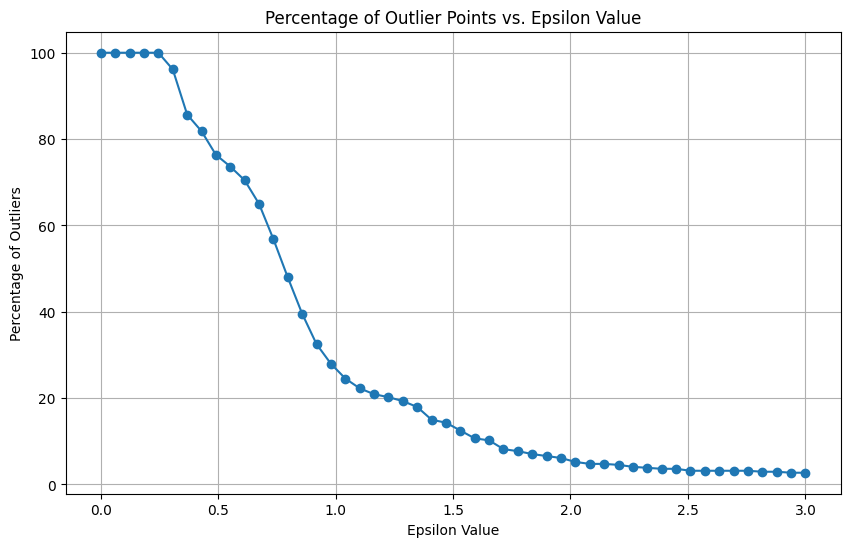

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, outlier_percentages, marker='o')
plt.title('Percentage of Outlier Points vs. Epsilon Value')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.grid(True)
plt.show()

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [30]:
dbscan_new = DBSCAN(eps=1, min_samples=min_samples)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

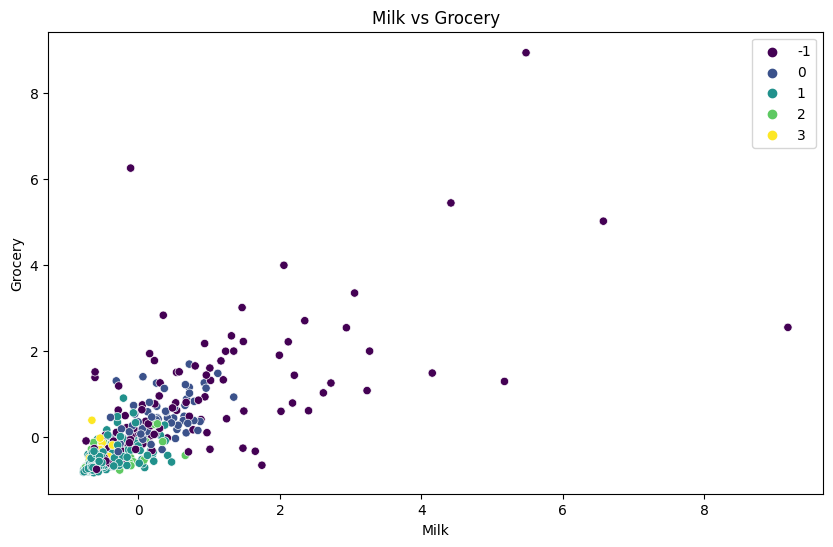

In [35]:
dbscan_new.fit(df_scaled)
labels = dbscan_new.labels_
# Create scatterplot of Milk vs Grocery, colored by DBSCAN labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Milk'], y=df_scaled['Grocery'], hue=labels, palette='viridis')
plt.title('Milk vs Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

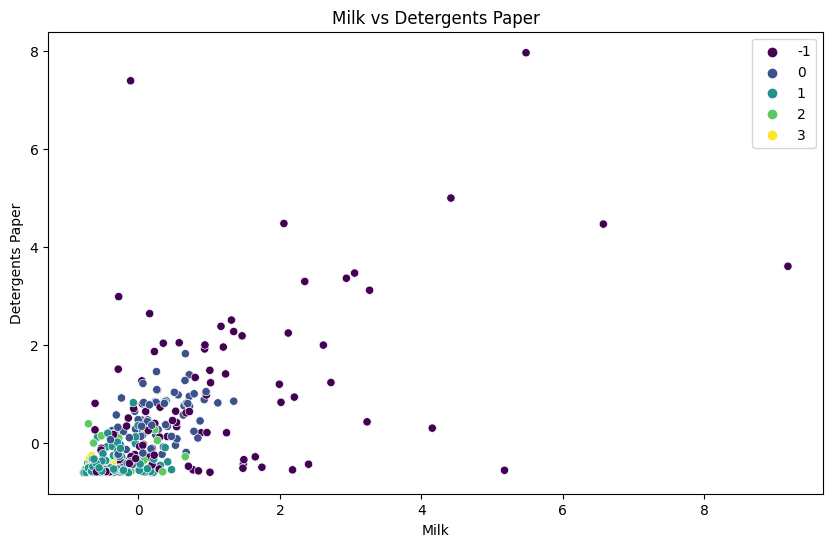

In [36]:
# Create scatterplot of Milk vs Detergents Paper, colored by DBSCAN labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Milk'], y=df_scaled['Detergents_Paper'], hue=labels, palette='viridis')
plt.title('Milk vs Detergents Paper')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [42]:
# Add DBSCAN labels to the original dataframe
df_scaled['Labels'] = labels
df_scaled.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Labels
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.590668,0
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.590668,0
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.590668,-1
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0.590668,1
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.590668,-1


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [43]:
clusters = df_scaled[df_scaled['Labels'] != -1].drop(columns=['Channel', 'Region'])
outliers = df_scaled[df_scaled['Labels'] == -1].drop(columns=['Channel', 'Region'])

cluster_mean = clusters.groupby('Labels').mean()
outlier_mean = outliers.groupby('Labels').mean()

compare_mean_df = pd.concat([cluster_mean, outlier_mean], keys=['Cluster', 'Outlier'])
compare_mean_df

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
        Labels                                                             
Cluster  0     -0.336269  0.246234  0.404795 -0.370078          0.455300   
         1     -0.109610 -0.427733 -0.493512 -0.119905         -0.454362   
         2     -0.213924 -0.409639 -0.507497 -0.140509         -0.414812   
         3     -0.201964 -0.559892 -0.420947 -0.151291         -0.495250   
Outlier -1      0.513740  0.768437  0.783160  0.512750          0.663779   

                Delicassen  
        Labels              
Cluster  0       -0.076942  
         1       -0.190664  
         2       -0.240681  
         3       -0.250194  
Outlier -1        0.488998

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

Text(50.722222222222214, 0.5, 'Clusters and Outliers')

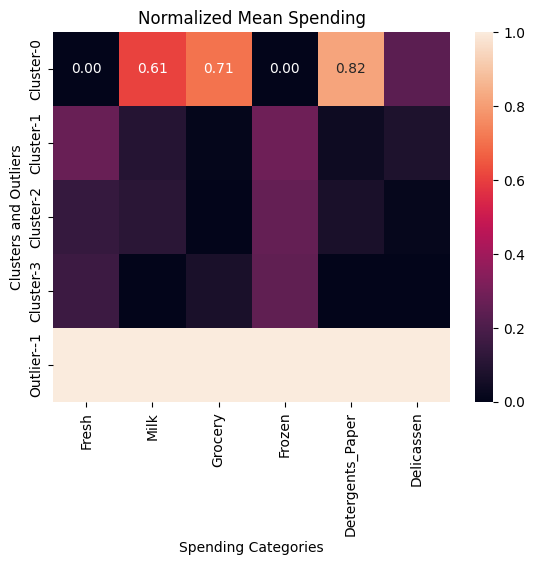

In [45]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(compare_mean_df)
normalized_df = pd.DataFrame(normalized_df, columns=compare_mean_df.columns, index=compare_mean_df.index)

sns.heatmap(normalized_df, annot=True, fmt=".2f")
plt.title('Normalized Mean Spending')
plt.xlabel('Spending Categories')
plt.ylabel('Clusters and Outliers')

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

Text(50.722222222222214, 0.5, 'Cluster')

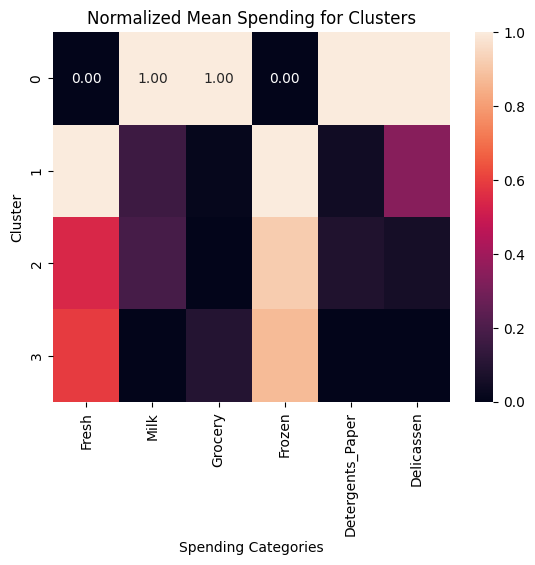

In [46]:
cluster_mean_norm= scaler.fit_transform(cluster_mean)
cluster_normalized_df = pd.DataFrame(cluster_mean_norm, columns=cluster_mean.columns, index=cluster_mean.index)

sns.heatmap(cluster_normalized_df, annot=True, fmt=".2f")
plt.title('Normalized Mean Spending for Clusters')
plt.xlabel('Spending Categories')
plt.ylabel('Cluster')

**TASK: What spending category were the two clusters mode different in?**

The expenditure category Delicassen values change from the two previously created heatmaps (particularly, heatmaps with and without outliers).